In [1]:
import cv2

%matplotlib notebook
from matplotlib import pyplot as plt

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Matplotlib

- 2D and 3D publication quality plotting library
- It provides a large set of plotting tools
  - Histograms
  - Bar plots
  - Scatter plots
  - Vector fields

Matplotlib is a 2D plotting aimed to interactive computing and publication-quality
image generation. It is a more powerful tool to display images than the standard OpenCV
utilities. Interactive zooming, interpolation, automatic scaling and floating point array visualization are Matplotlib features that are not available in OpenCV. It also provides a large set of plotting tools, similar to R and Matlab, including line plots, scatter plots, bar plots, histograms and vector.

Matplotlib’s maintainers keep a [gallery of plotting examples](http://matplotlib.org/gallery.html). Users can pick the desired plot from the gallery and inspect its source code, using it as a template or starting point for their own graphics.

## OpenCV `imshow` vs. Matplotlib `imshow`

- OpenCV `imshow` functions presents very limited capabilities
  - It can display 8 bits unsigned integer images
  - In general, it's unable to provide visualization for arrays presenting different data types
- Matplotlib `imshow` is a more capable visualization tool
  - It is able to visualize arrays of different types
    - Provides different **color mapping** alternatives
  - It presents **interactive zooming**
  - Automatic scaling for large or small images
    - Different **interpolation methods** available

OpenCV presents an `imshow` function that lets the user display an image in a graphic window. It can show standard 8 bits color or grayscale images, but different data types need adaptions. For 16 bits and 32 bits integers, the pixels values are divided by 256, mapping a $[0, 65280]$ range to $[0, 255]$ before displaying. For 32 bits floating-point images, values are multiplied by 255, what maps the value range $[0, 1]$ to $[0, 255]$. Zooming is not supported and high-resolution images are not be fitted to the computer’s screen, making the visualization of large images inconvenient. Remote sensing data or high-resolution photographies usually needs some sort of scaling before displaying.

Matplotlib presents its own `imshow` function, able to display NumPy arrays as images. Differently of the OpenCV counterpart, this function is a more capable tool for scientific visualization. Images are fitted to the plotting window according to different interpolation methods (bilinear, bicubic, sinc and Lanczos, to name just a few). Interactive zooming is available, a convenient feature when the user is inspecting the results of image processing routines. Matplotlib is able to show color images in the form of $M \times N \times 3$ RGB arrays (floating point or integer data types) or $M \times N \times 4$ RGBA arrays presenting an alpha channel. Bidimensional $M \times N$ arrays (as integer or floating point grayscale images) are exhibited using a *colormap* automatically fitted to the array range. The `colorbar` function can be used to plot a bar that illustrates the color/value mapping employed.

### Color image visualization

<IPython.core.display.Javascript object>


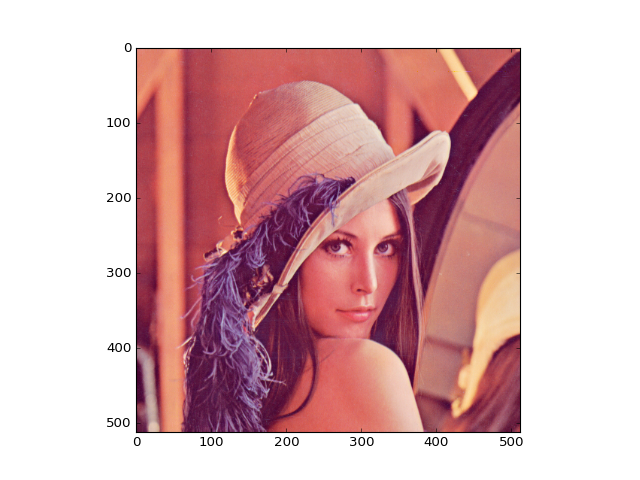

In [2]:
lenna = cv2.cvtColor(cv2.imread('data/lenna.tiff'), cv2.COLOR_BGR2RGB)
plt.imshow(lenna)

### Grayscale or single channel images

Bilinear interpolation (*default*), `cm.jet` colormap (*default*):

<IPython.core.display.Javascript object>


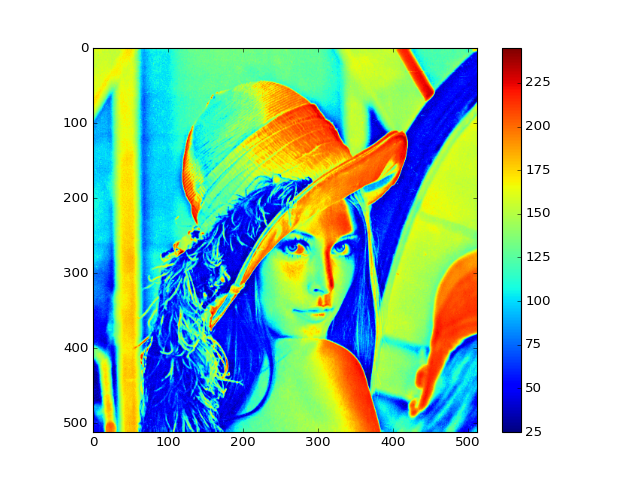

In [4]:
slenna = cv2.imread('data/lenna.tiff', cv2.IMREAD_GRAYSCALE)
plt.imshow(slenna)
plt.colorbar()

Bilinear interpolation, `cm.gray` colormap:

<IPython.core.display.Javascript object>


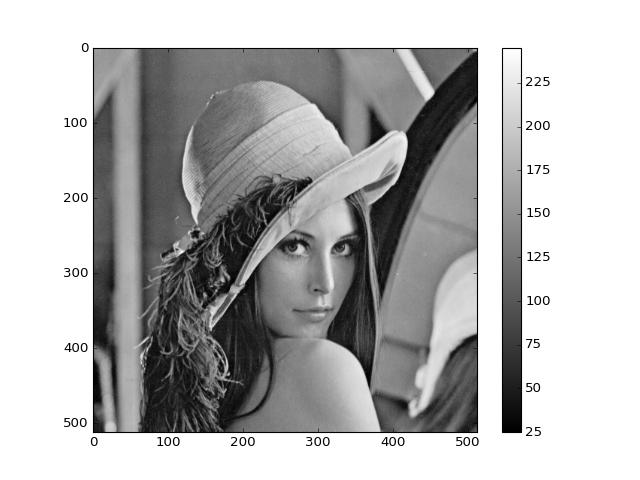

In [5]:
plt.imshow(slenna, cmap=plt.cm.gray)
plt.colorbar()

Nearest interpolation, `cm.gray` colormap:

<IPython.core.display.Javascript object>


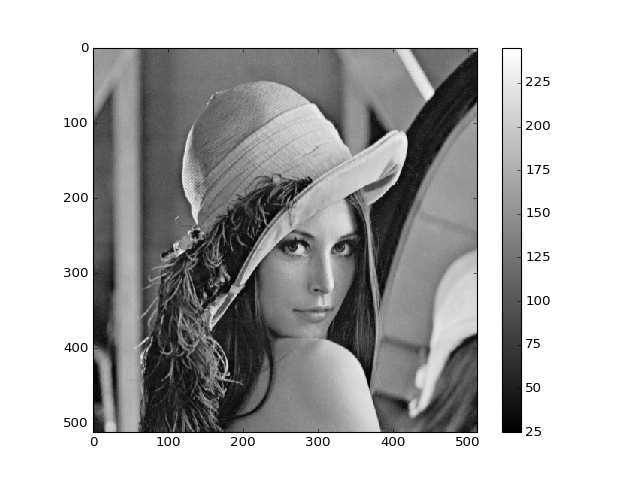

In [6]:
plt.imshow(slenna, interpolation='nearest', cmap=plt.cm.gray)
plt.colorbar()

Bilinear vs. Nearest

<IPython.core.display.Javascript object>


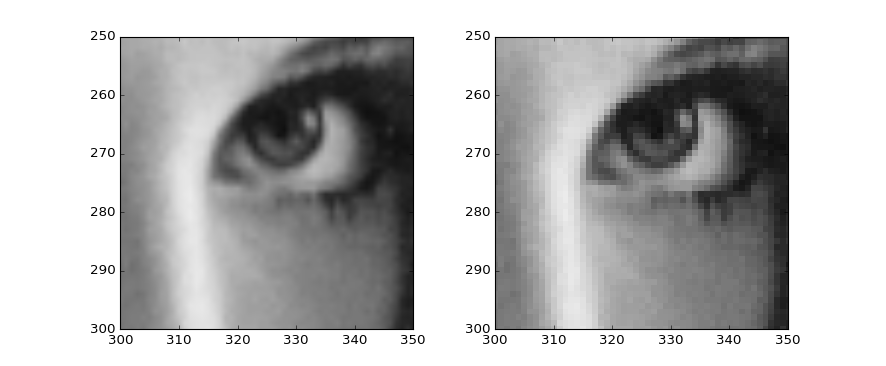

(300, 250)

In [7]:
plt.subplot(1,2,1)
plt.imshow(slenna, cmap=plt.cm.gray)
plt.xlim(300, 350)
plt.ylim(300, 250)

plt.subplot(1,2,2)
plt.imshow(slenna, interpolation='nearest', cmap=plt.cm.gray)
plt.xlim(300, 350)
plt.ylim(300, 250)

# Example 3 - Showing 2D features

In this example, GFTT, SIFT and SURF features as computed by OpenCV and the results are visualized using Matplotlib `plot` and `scatter` functions.

<IPython.core.display.Javascript object>


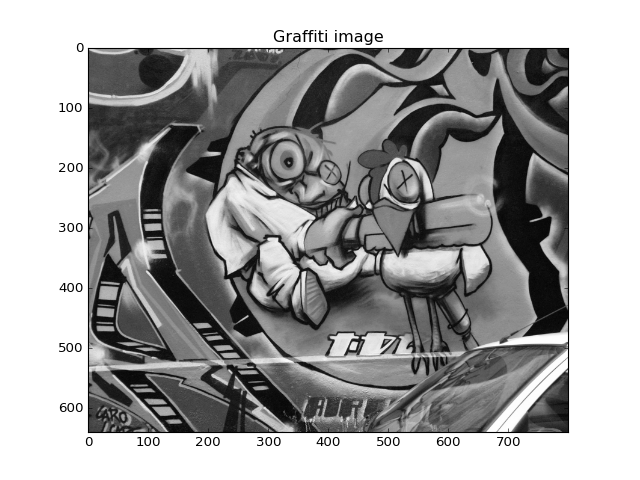

In [9]:
graffiti = cv2.imread('data/graffiti-Mikolajczyk.ppm', cv2.IMREAD_GRAYSCALE)
plt.imshow(graffiti, cmap=plt.cm.gray)
plt.title('Graffiti image')

- GFTT (*Good Features To Track*) will return up to 2000 features, at least 3 pixels appart
- The `plot` takes list containing the $x$ and $y$ coordinates

The OpenCV wrapper of the GFTT function returns 2D points as a NumPy array. The `plot` function in Matplotlib takes two lists (or arrays) containing respectively the points’ $x$
and $y$ coordinates:

<IPython.core.display.Javascript object>


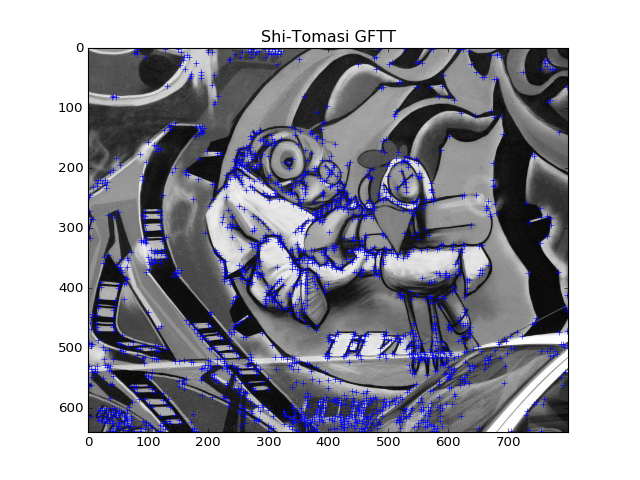

In [11]:
kpts = cv2.goodFeaturesToTrack(graffiti, 2000, 0.01, 3)
plt.plot(kpts[:,:,0], kpts[:,:,1], 'b+')
plt.imshow(graffiti, cmap=plt.cm.gray)
plt.title('Shi-Tomasi GFTT')

In the code above, OpenCV’s GFTT will return up to 2000 corners (features), all of them at least 3 pixels appart. The 0.01 is a quality level parameter defined over the eigen values
(see [OpenCV’s documentation for details](http://docs.opencv.org/modules/imgproc/doc/feature_detection.html?highlight=goodfeaturestotrack#cv2.goodFeaturesToTrack)). The features are returned as a $2000 \times 1 \times 2$ array and slicing is used in the plotting function to recover the lists of $x$ and $y$ coordinates. The `b+` argument informs Matplotlib the points have to be plotted as blue crosses. Finally, imshow is employed to display the image.

- Features like SIFT and SURF are not "dimensionless"
- They are **multi-scale features** defined over a *neighborhood* 
- OpenCV's `Keypoint` structure represent these features
  - `Keypoint.pt` keeps the feature location
  - `Keypoint.size` keeps the diameter of the meaningful neighborhood

Differently of the GFTT features, SIFT and SURF are not dimensionless. They are [multi-scale features](http://dx.doi.org/10.1561/0600000017) and are defined over neighborhoods presenting different sizes. OpenCV represents these features using the `KeyPoint` data structure: the feature coordinates are stored in the `pt` variable and the neighborhood diameter in the `size` variable. The scatter function is able to take a list of sizes and plot the points as circular regions:

In [19]:
from math import pi
sift = cv2.xfeatures2d.SIFT_create()
kpts = sift.detect(graffiti)
x = [k.pt[0] for k in kpts]
y = [k.pt[1] for k in kpts]
# s will correspond to the neighborhood area
s = [(k.size/2)**2 * pi for k in kpts]

According to `scatter` documentation (type `plt.scatter?` for help):

- `x`, `y` are the input data, $x$ and $y$ plane coordinates
- `s` is an array containing the size in points².
- `c` is the color (`r` for *red*)
- `marker` (`s` for squares, `o` for circles, and so on)  

<IPython.core.display.Javascript object>


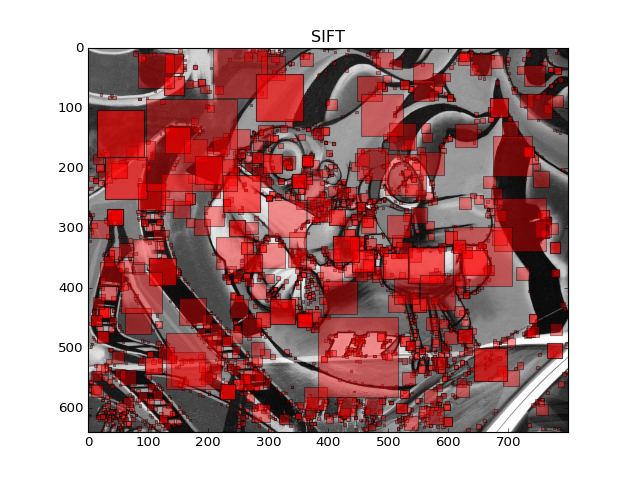

In [21]:
plt.scatter(x, y, s, c='r', marker='s', alpha=0.4)
plt.imshow(graffiti, cmap=plt.cm.gray)
plt.title('SIFT')

In the code above, the `alpha` parameter is employed to plot using a 40% transparency, allowing the viewer to see the image below the circles, and the `r` parameter asks for a
plotting in *red*.

<IPython.core.display.Javascript object>


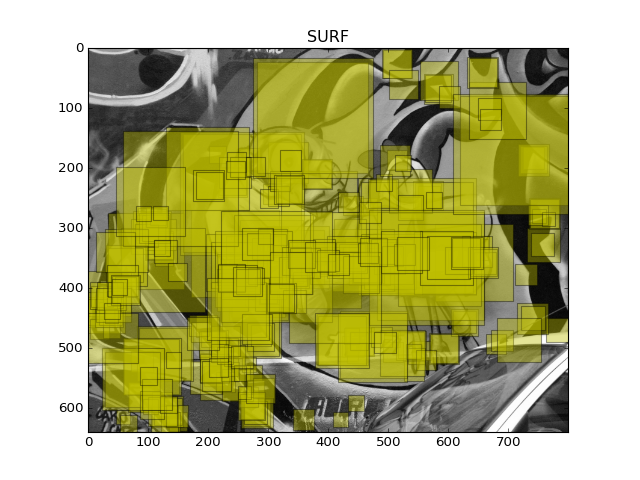

In [28]:
surf = cv2.xfeatures2d.SURF_create(hessianThreshold=8000)
kpts = surf.detect(graffiti)
x = [k.pt[0] for k in kpts]
y = [k.pt[1] for k in kpts]
s = [(k.size/2)**2 * pi for k in kpts]
plt.scatter(x, y, s, c='y', marker='s', alpha=0.4)
plt.imshow(graffiti, cmap=plt.cm.gray)
plt.title('SURF')